In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0
...,...,...,...,...
130070,NaN,Zimbabwe,2021-05-04,38327
130071,NaN,Zimbabwe,2021-05-05,38357
130072,NaN,Zimbabwe,2021-05-06,38398
130073,NaN,Zimbabwe,2021-05-07,38403


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df

,date,count
0,2020-01-22,557
1,2020-01-23,655
2,2020-01-24,941
3,2020-01-25,1433
4,2020-01-26,2118
...,...,...
468,2021-05-04,154359533
469,2021-05-05,155200532
470,2021-05-06,156070356
471,2021-05-07,156901680


In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


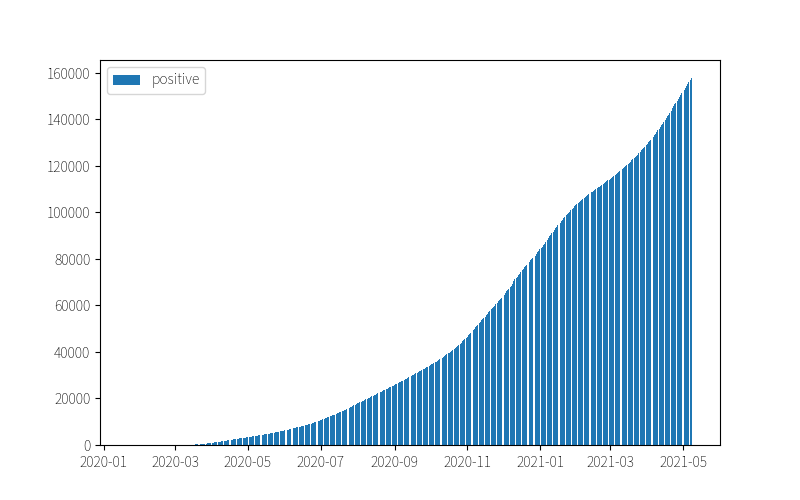

In [11]:
plt.figure(figsize=(8,5))
plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
plt.legend()

#### 